In [13]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [14]:
time_data = pd.read_csv("../data/time_data.csv")
del time_data["Unnamed: 0"]

In [15]:
time_data

,date,sale_price,user_session_count,brand_max,price_max,brand_min,price_min,max_brand_portion,min_brand_portion,category_max,c_price_max,category_min,c_price_min,max_category_portion,min_category_portion,num_new_users
0,2019-10-01,43544.79,8476,runail,3762.06,beauty-free,1.25,8.64%,0.00%,1487580005092295511,2656.37,1487580010846879833,0.38,6.10%,0.00%,19230
1,2019-10-02,45762.08,9100,runail,3864.66,supertan,1.19,8.45%,0.00%,1487580006300255120,2924.51,1487580010846879833,0.76,6.39%,0.00%,31738
2,2019-10-03,43507.96,8865,runail,3571.26,cosima,1.19,8.21%,0.00%,1487580005092295511,2397.78,1487580012717539489,0.56,5.51%,0.00%,13355
3,2019-10-03,43507.96,8865,runail,3571.26,rocknailstar,1.19,8.21%,0.00%,1487580005092295511,2397.78,1487580012717539489,0.56,5.51%,0.00%,13355
4,2019-10-04,35887.15,7562,runail,3450.74,bioaqua,1.27,9.62%,0.00%,1487580006300255120,2534.19,1487580013917110492,0.60,7.06%,0.00%,11437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-02-26,45050.56,9126,runail,2261.64,supertan,1.82,5.02%,0.00%,1487580006300255120,3097.40,1487580011182424167,0.32,6.88%,0.00%,10430
164,2020-02-27,45454.90,9726,runail,2339.29,eunyul,0.95,5.15%,0.00%,1487580005092295511,2923.37,1487580010377117763,0.63,6.43%,0.00%,10395
165,2020-02-27,45454.90,9726,runail,2339.29,eunyul,0.95,5.15%,0.00%,1487580005092295511,2923.37,1487580010955931741,0.63,6.43%,0.00%,10395
166,2020-02-28,40653.92,8328,grattol,2091.63,glysolid,1.41,5.14%,0.00%,1487580005092295511,2681.11,1487580013917110492,0.25,6.59%,0.00%,9993


In [16]:
time_data_NumNewUsers = time_data[["date", "num_new_users"]].rename(columns = {"date":"ds", "num_new_users":"y"})

In [17]:
time_data_NumNewUsers

,ds,y
0,2019-10-01,19230
1,2019-10-02,31738
2,2019-10-03,13355
3,2019-10-03,13355
4,2019-10-04,11437
...,...,...
163,2020-02-26,10430
164,2020-02-27,10395
165,2020-02-27,10395
166,2020-02-28,9993


In [18]:
m_NNU = Prophet().fit(time_data_NumNewUsers)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future_NNU = m_NNU.make_future_dataframe(periods=90)
future_NNU.tail()

,ds
237,2020-05-25
238,2020-05-26
239,2020-05-27
240,2020-05-28
241,2020-05-29


In [20]:
forecast_NNU = m_NNU.predict(future_NNU)
forecast_NNU[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
237,2020-05-25,10491.659999,6981.824165,14023.381721
238,2020-05-26,10172.642644,6585.668068,13758.380166
239,2020-05-27,10696.415350,7317.572576,14453.745733
240,2020-05-28,9835.892189,6283.813204,13283.534537
241,2020-05-29,9360.032673,5676.660633,13119.776063


Text(0.5, 1, 'Title')

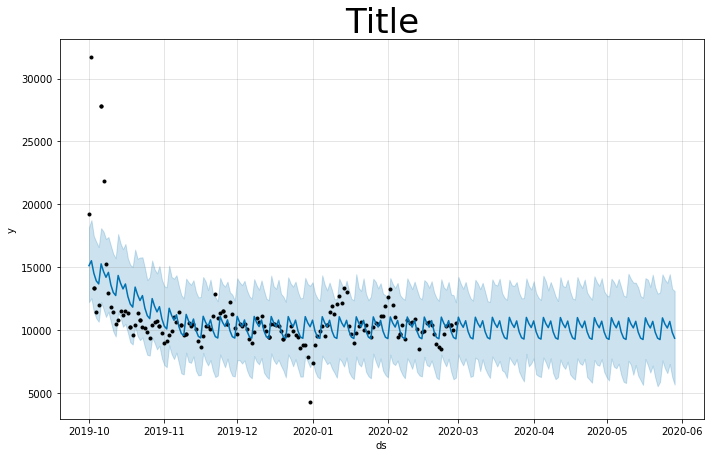

In [28]:
fig_NNU_1 = m_NNU.plot(forecast_NNU)

ax = fig_NNU_1.gca()

ax.set_title("Title", size=34)
# ax.spines['bottom'].set_color('blue')
# ax.spines['top'].set_color('yellow') 
# ax.spines['right'].set_color('red')
# ax.spines['left'].set_color('green')

# ax.tick_params(axis='x', colors='red')
# ax.tick_params(axis='y', colors='red')

# ax.yaxis.label.set_color('green')
# ax.xaxis.label.set_color('green')

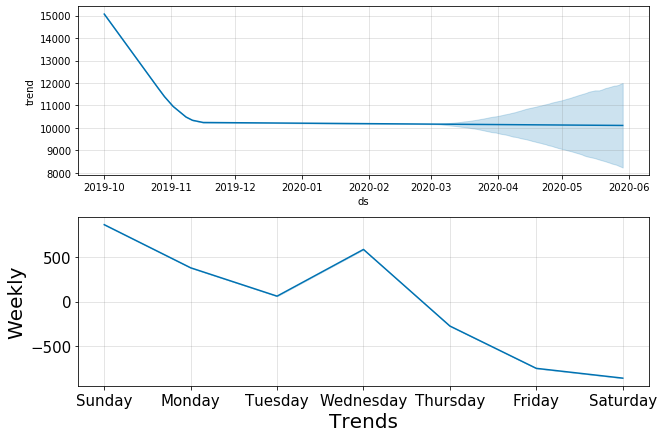

In [84]:
fig_NNU_2 = m_NNU.plot_components(forecast_NNU)
ax = fig_NNU_2.gca()
ax.set_xlabel("Trends",fontsize=20)
ax.set_ylabel("Weekly",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

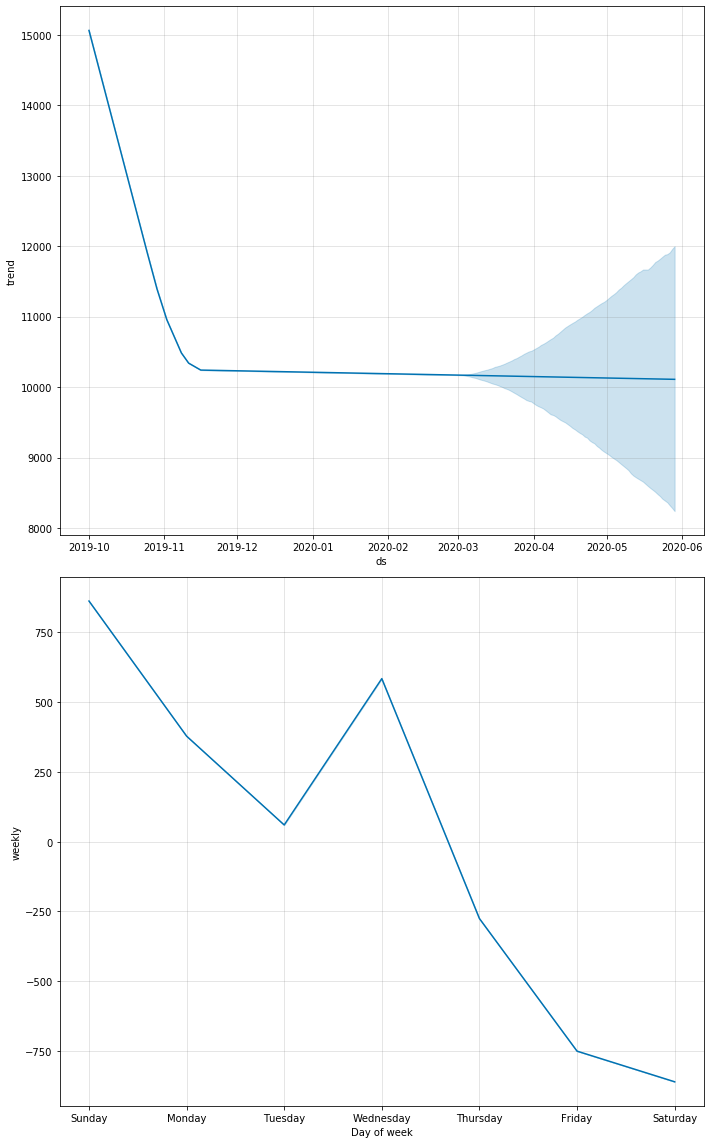

In [45]:
fig_NNU_2 = m_NNU.plot_components(forecast_NNU, figsize = (10, 16))

In [23]:
fig_NNU_2.savefig("../plots/Forecasted New Users.png")

In [11]:
time_data_1 = pd.read_csv("../data/data1.csv", parse_dates=['event_time'])

In [12]:
time_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20688242 entries, 0 to 20688241
Data columns (total 12 columns):
 #   Column         Dtype              
---  ------         -----              
 0   Unnamed: 0     int64              
 1   event_time     datetime64[ns, UTC]
 2   event_type     object             
 3   product_id     int64              
 4   category_id    int64              
 5   category_code  object             
 6   brand          object             
 7   price          float64            
 8   user_id        int64              
 9   user_session   object             
 10  days           int64              
 11  date           object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(5)
memory usage: 1.8+ GB


In [13]:
time_data_p = time_data_1[time_data_1["event_type"] == "purchase"]

In [14]:
time_data_p_1 = time_data_p[["event_time", "price"]].rename(columns = {"event_time":"ds", "price":"y"})

In [15]:
time_data_p_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287007 entries, 202 to 20688126
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype              
---  ------  --------------    -----              
 0   ds      1287007 non-null  datetime64[ns, UTC]
 1   y       1287007 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 29.5 MB


In [16]:
time_data_p_1["ds"] = time_data_p_1['ds'].dt.tz_localize(None)

In [17]:
m_NNU_1 = Prophet().fit(time_data_p_1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [18]:
future_NNU_1 = m_NNU_1.make_future_dataframe(periods=90)
future_NNU_1.tail()

,ds
157975,2020-04-25 23:54:44
157976,2020-04-26 23:54:44
157977,2020-04-27 23:54:44
157978,2020-04-28 23:54:44
157979,2020-04-29 23:54:44


In [19]:
future_NNU_1 = m_NNU_1.predict(future_NNU_1)


In [20]:
future_NNU_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
157975,2020-04-25 23:54:44,4.559069,-7.170913,16.365497
157976,2020-04-26 23:54:44,4.653949,-6.226339,16.070510
157977,2020-04-27 23:54:44,4.662680,-6.599059,16.312216
157978,2020-04-28 23:54:44,4.631545,-5.848513,16.058851
157979,2020-04-29 23:54:44,4.669695,-7.504506,16.245804


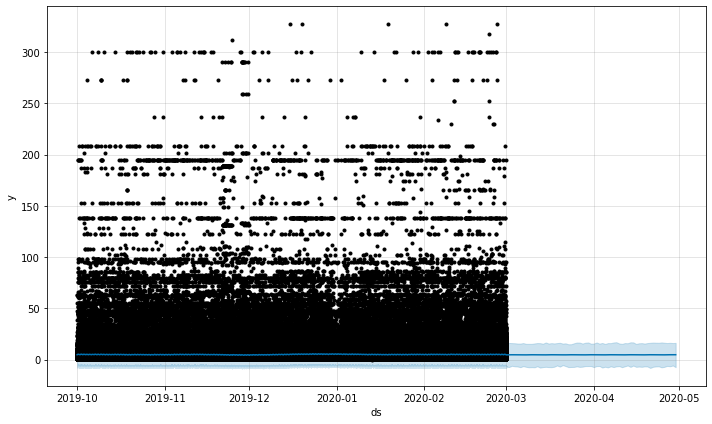

In [21]:
fig_NNU_1_1 = m_NNU_1.plot(future_NNU_1)

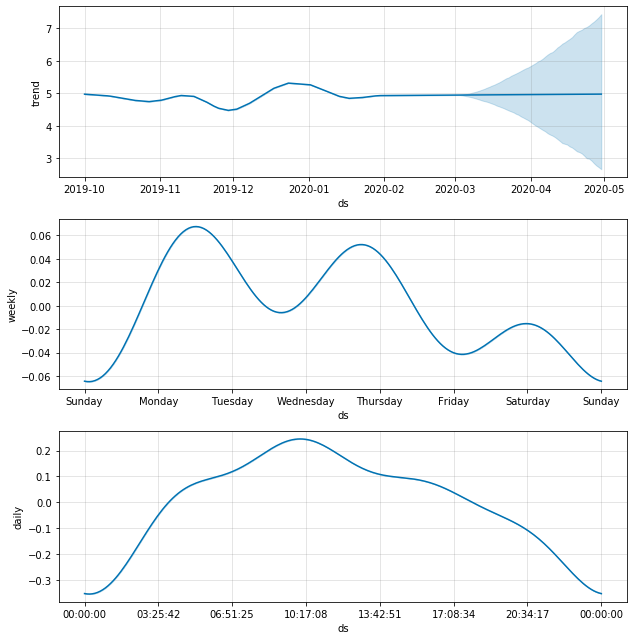

In [22]:
fig_NNU_2_1 = m_NNU_1.plot_components(future_NNU_1)
ax = fig_NNU_2_1.gca()
ax[0].tick_params(axis='Date')
ax[0].tick_params(axis='Value')

ax[1].tick_params(axis='Date')
ax[1].tick_params(axis='Value')

ax[2].tick_params(axis='Date')
ax[2].tick_params(axis='Value')

In [44]:
fig_NNU_2_1.savefig("../plots/Forecasted New Users.png")